In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [73]:
df = pd.read_excel('data/总指标.xlsx')
df.columns = df.columns.str.replace('GDP:支出法','GDP_支出法')

In [74]:
%matplotlib inline
def hp(ts, lamb=10):
    def D_matrix(N):
        D = np.zeros((N-1,N))
        D[:,1:] = np.eye(N-1)
        D[:,:-1] -= np.eye(N-1)
        """D1
        [[-1.  1.  0. ...  0.  0.  0.]
         [ 0. -1.  1. ...  0.  0.  0.]
         [ 0.  0. -1. ...  0.  0.  0.]
         ...
         [ 0.  0.  0. ...  1.  0.  0.]
         [ 0.  0.  0. ... -1.  1.  0.]
         [ 0.  0.  0. ...  0. -1.  1.]]
        """
        return D
    N = len(ts)
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    D = D2 @ D1
    # G = [i+λF]*-1Y
    #np.linalg.inv为矩阵求逆 套用公式 D.T@D = F F.shape=(N,N)
    g = np.linalg.inv((np.eye(N)+lamb*D.T@D))@ ts
    return g


def sf(data,name):
    print('*****'+name+"*****")
    ts = data
    plt.figure(figsize=(10,10))
    
    for i,l in enumerate(range(1,8,2)):
        print(i,l)
        plt.subplot(3,2,i+1)
        g = hp(ts,l)
        plt.plot(ts, label='HP之前'+name)
        plt.plot(g, label='HP之后'+name)
        plt.legend()
        plt.title('$\lambda$='+str(l))
        plt.savefig('img/'+name+'.png')
    plt.show

*****GDP_支出法*****
0 1
1 3
2 5
3 7
*****logGDP*****
0 1
1 3
2 5
3 7
*****GDP增长速度*****
0 1
1 3
2 5
3 7
*****CPI*****
0 1
1 3
2 5
3 7
*****利率*****
0 1
1 3
2 5
3 7
*****失业率*****
0 1
1 3
2 5
3 7
*****工业增加值同比增速*****
0 1
1 3
2 5
3 7


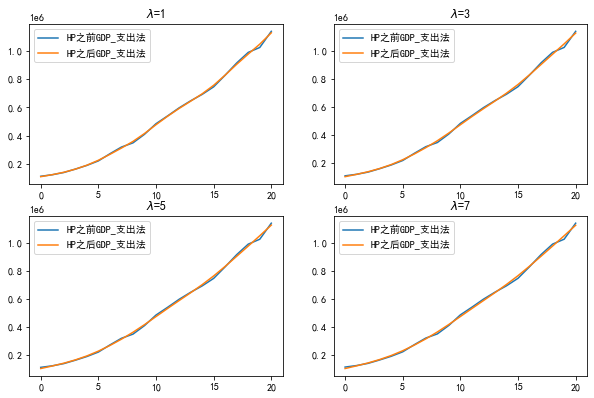

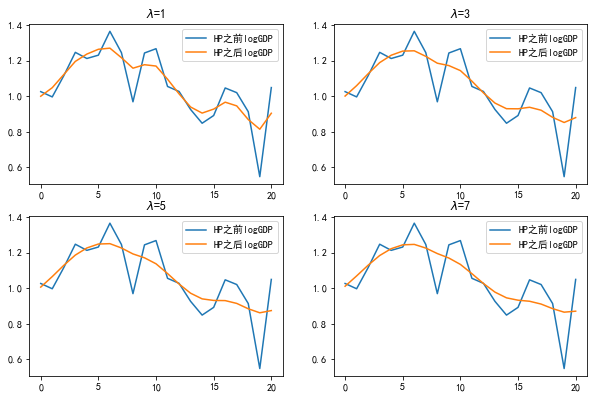

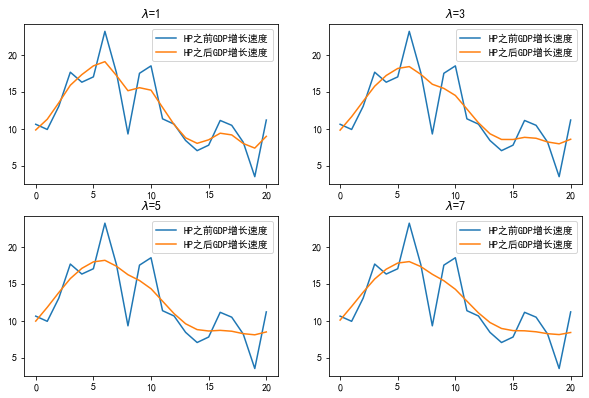

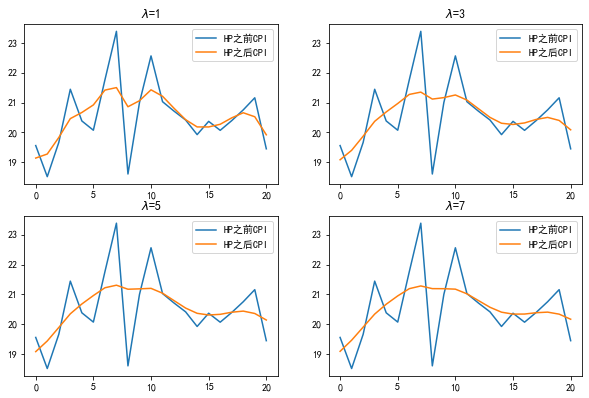

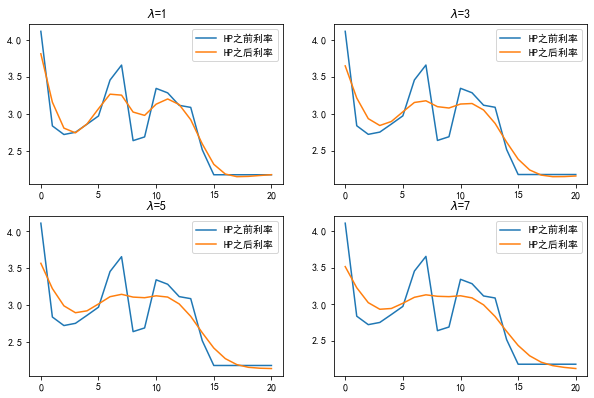

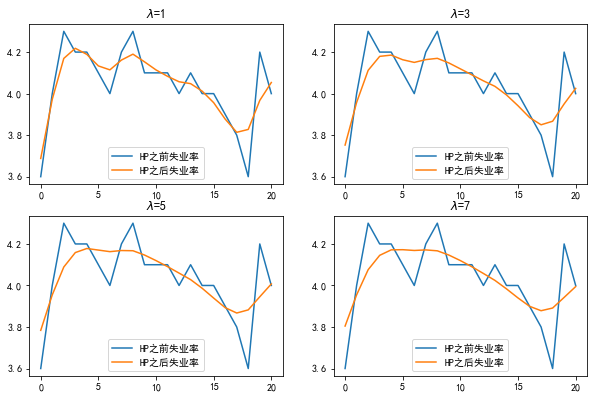

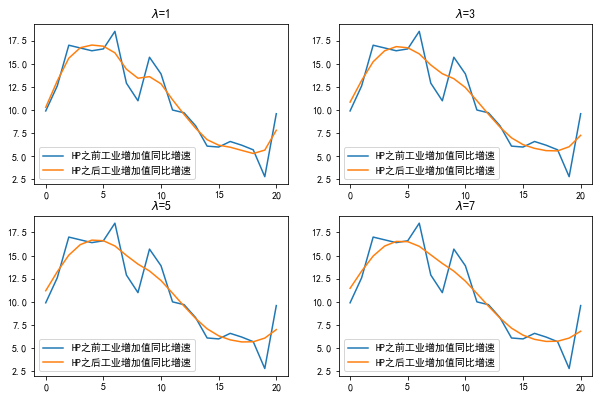

In [75]:
for i in df.iloc[:,2:9]:
    sf(df[i],i)

In [33]:
df.iloc[:,2:9].head()

,GDP:支出法,logGDP,GDP增长速度,CPI,利率,失业率,工业增加值同比增速
0,110388.3546,1.025745,10.610723,19.557238,4.111008,3.6,9.9
1,121326.6807,0.996028,9.908949,18.513472,2.837412,4.0,12.6
2,137146.7098,1.115251,13.039200,19.661963,2.721630,4.3,17.0
3,161355.6052,1.246790,17.651824,21.446651,2.751739,4.2,16.7
4,187657.5436,1.212204,16.300604,20.383730,2.859920,4.2,16.4
